# flower images classification with data augmentation project completed

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2    # opencv for preprocess the image
import os
import PIL         # pillow library has multiple usefull function for preprocess the images
import tensorflow as tf
import pathlib # for the window  ----> path pthlib.Path('path')
import glob     # to describe the folder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from sklearn.model_selection import train_test_split

## some of other explanation i has covered, for the purpose of revised the skills  with comment

In [2]:
# download dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory   '.' indicates current directory
# untar true will unzip it
# flower_photos our folder name in which all the fotos will be download
# origin parameter takes the url of file

# data  =  tensorflow.keras.datasets.cifar100           <---- this API has all datasets
# data.load_data()

In [3]:
data_dir


'.\\datasets\\flower_photos'

In [3]:
data_dr = pathlib.Path(data_dir)
data_dr
# and now i have window path

WindowsPath('datasets/flower_photos')

In [11]:
data_dr.cwd()
# current working directory

WindowsPath('C:/Users/Ranjit Singh/Desktop/coding/Data Scientist/CNN/data_augmentation')

In [13]:
list(data_dr.iterdir()) 
# you can see i have only five folder

[WindowsPath('datasets/flower_photos/daisy'),
 WindowsPath('datasets/flower_photos/dandelion'),
 WindowsPath('datasets/flower_photos/LICENSE.txt'),
 WindowsPath('datasets/flower_photos/roses'),
 WindowsPath('datasets/flower_photos/sunflowers'),
 WindowsPath('datasets/flower_photos/tulips')]

In [14]:
data_dr.glob('*/*.jpg')

# */*   -----> means name anything but i want all those which has extension .jpg

<generator object Path.glob at 0x0000012E993FA730>

In [16]:
for i in data_dr.glob('*/*.jpg'):
    print(i)

datasets\flower_photos\daisy\100080576_f52e8ee070_n.jpg
datasets\flower_photos\daisy\10140303196_b88d3d6cec.jpg
datasets\flower_photos\daisy\10172379554_b296050f82_n.jpg
datasets\flower_photos\daisy\10172567486_2748826a8b.jpg
datasets\flower_photos\daisy\10172636503_21bededa75_n.jpg
datasets\flower_photos\daisy\102841525_bd6628ae3c.jpg
datasets\flower_photos\daisy\1031799732_e7f4008c03.jpg
datasets\flower_photos\daisy\10391248763_1d16681106_n.jpg
datasets\flower_photos\daisy\10437754174_22ec990b77_m.jpg
datasets\flower_photos\daisy\10437770546_8bb6f7bdd3_m.jpg
datasets\flower_photos\daisy\10437929963_bc13eebe0c.jpg
datasets\flower_photos\daisy\10466290366_cc72e33532.jpg
datasets\flower_photos\daisy\10466558316_a7198b87e2.jpg
datasets\flower_photos\daisy\10555749515_13a12a026e.jpg
datasets\flower_photos\daisy\10555815624_dc211569b0.jpg
datasets\flower_photos\daisy\10555826524_423eb8bf71_n.jpg
datasets\flower_photos\daisy\10559679065_50d2b16f6d.jpg
datasets\flower_photos\daisy\105806915_

In [17]:
list(data_dr.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [19]:
total_images = len(list(data_dr.glob('*/*.jpg')))
total_images
# total no. of images

3670

In [21]:
list(data_dr.glob('daisy'))

[WindowsPath('datasets/flower_photos/daisy')]

In [24]:
list(data_dr.glob('daisy/*'))   # i accessed all images from daisy folder

WindowsPath('datasets/flower_photos/daisy/99306615_739eb94b9e_m.jpg')

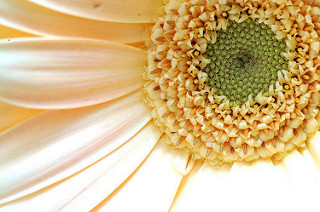

In [29]:
PIL.Image.open(r'C:\Users\Ranjit Singh\Desktop\coding\Data Scientist\CNN\data_augmentation\datasets\flower_photos\daisy\5673551_01d1ea993e_n.jpg')
# simple way to open image just pass the url


In [36]:
list(data_dr.iterdir())

[WindowsPath('datasets/flower_photos/daisy'),
 WindowsPath('datasets/flower_photos/dandelion'),
 WindowsPath('datasets/flower_photos/LICENSE.txt'),
 WindowsPath('datasets/flower_photos/roses'),
 WindowsPath('datasets/flower_photos/sunflowers'),
 WindowsPath('datasets/flower_photos/tulips')]

In [44]:
roses = list(data_dr.glob('roses/*'))
roses[0:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [48]:
# length of roses
len(roses)

641

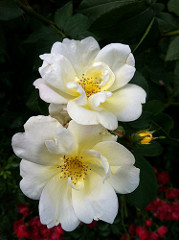

In [46]:
PIL.Image.open(roses[0])

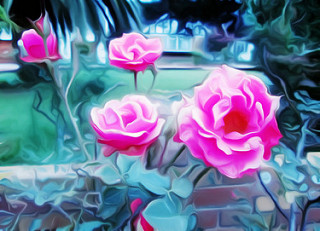

In [47]:
PIL.Image.open(roses[25])

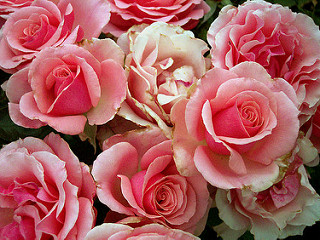

In [49]:
PIL.Image.open(roses[58])

In [51]:
tulips = list(data_dr.glob('tulips/*'))
tulips[0:5]


[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

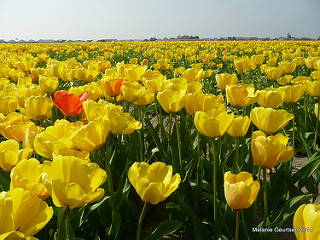

In [55]:
PIL.Image.open(tulips[86])

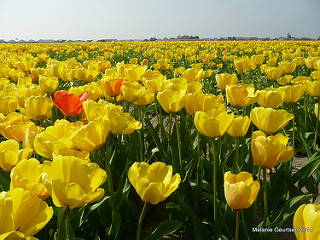

In [57]:
PIL.Image.open(tulips[86])

In [66]:
list(data_dr.iterdir())

[WindowsPath('datasets/flower_photos/daisy'),
 WindowsPath('datasets/flower_photos/dandelion'),
 WindowsPath('datasets/flower_photos/LICENSE.txt'),
 WindowsPath('datasets/flower_photos/roses'),
 WindowsPath('datasets/flower_photos/sunflowers'),
 WindowsPath('datasets/flower_photos/tulips')]

In [4]:
# assign all images in the dictionary
flower_list = {
    'roses':list(data_dr.glob('roses/*')),
    'daisy':list(data_dr.glob('daisy/*')),
    'dandelion':list(data_dr.glob('dandelion/*')),
    'sunflowers':list(data_dr.glob('sunflowers/*')),
    'tulips':list(data_dr.glob('tulips/*'))}

In [5]:
flower_list_labels = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4}

In [7]:
flower_list['dandelion'][0:5]

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg')]

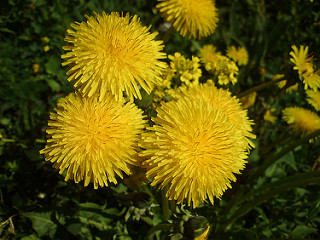

In [71]:
PIL.Image.open(flower_list['dandelion'][96])

In [74]:
flower_list_labels['roses']
# label of rose

0

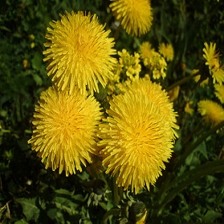

In [77]:
PIL.Image.open(flower_list['dandelion'][96]).resize((224,224))
# this function is used resize the image

In [22]:
img = PIL.Image.open(flower_list['dandelion'][96]).resize((224,224))

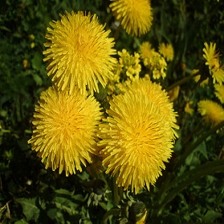

In [23]:
img

In [86]:
img.save('dandelion.jpg')      # image has been saved at my current directory

In [94]:
flower_list['roses'][1]
# this is window path

WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')

In [95]:
str(flower_list['roses'][1])
# now this is absolute path

'datasets\\flower_photos\\roses\\102501987_3cdb8e5394_n.jpg'

In [98]:
first_rose_array = cv2.imread(str(flower_list['roses'][1]))
first_rose_array

# same method for this task  --->  np.array(image)
# before pass the image here first you should open image with the help pillow library

array([[[10, 16, 15],
        [17, 22, 21],
        [15, 17, 17],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[15, 21, 20],
        [ 9, 14, 13],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[16, 22, 21],
        [ 7, 12, 11],
        [ 0,  5,  4],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 0,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  1,  1],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 1,  3,  3],
        [ 0,  2,  2],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 3,  5,  5],
        [ 3,  5,  5],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 1,  3,  3],
        [ 1,  3,  3]]], dtype=uint8)

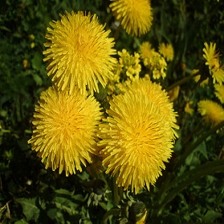

In [99]:
img

In [101]:
np.array(img)

array([[[ 5, 10,  3],
        [ 5, 10,  3],
        [ 5, 10,  3],
        ...,
        [ 9, 17,  0],
        [ 8,  7,  2],
        [ 9,  4,  7]],

       [[ 4, 10,  0],
        [ 5, 11,  1],
        [ 5, 11,  1],
        ...,
        [11, 20,  0],
        [10, 12,  3],
        [ 4,  7,  2]],

       [[ 3, 11,  0],
        [ 5, 13,  2],
        [ 6, 12,  2],
        ...,
        [19, 27,  1],
        [16, 20,  9],
        [ 3, 13,  3]],

       ...,

       [[10,  7,  4],
        [16, 17,  6],
        [56, 59, 10],
        ...,
        [ 3,  5,  1],
        [ 7,  8,  0],
        [13, 13,  0]],

       [[55, 42,  9],
        [50, 43, 16],
        [52, 52,  3],
        ...,
        [ 6,  9,  0],
        [ 9, 10,  0],
        [12, 10,  0]],

       [[98, 78, 16],
        [87, 75, 29],
        [56, 55, 17],
        ...,
        [11, 17,  1],
        [15, 18,  5],
        [16, 14,  2]]], dtype=uint8)

In [102]:
np.array(img).shape

(224, 224, 3)

In [103]:
np.array(img)[1]

array([[  4,  10,   0],
       [  5,  11,   1],
       [  5,  11,   1],
       [  5,   9,   0],
       [  5,   8,   0],
       [ 11,  15,   0],
       [ 39,  47,  12],
       [ 50,  65,  13],
       [ 32,  49,   3],
       [ 13,  27,   2],
       [  3,  13,   2],
       [ 10,  18,   2],
       [ 19,  27,   7],
       [ 14,  22,   6],
       [  7,  15,   0],
       [  6,  15,   3],
       [  9,  17,   6],
       [ 11,  18,   5],
       [ 13,  24,   4],
       [ 17,  33,   8],
       [ 14,  31,   8],
       [ 20,  38,  14],
       [ 47,  56,  14],
       [ 68,  75,  20],
       [ 60,  75,  22],
       [ 41,  59,  14],
       [ 39,  56,  11],
       [ 43,  60,  10],
       [ 46,  65,  16],
       [ 43,  62,  16],
       [ 38,  56,  13],
       [ 32,  48,   4],
       [ 20,  34,   0],
       [ 11,  19,   0],
       [  6,   8,   0],
       [  5,  11,   0],
       [ 12,  21,   2],
       [ 19,  30,   6],
       [ 16,  28,   2],
       [ 22,  36,   2],
       [ 43,  57,   9],
       [ 41,  54

In [104]:
np.array(img)[1].shape

(224, 3)

In [106]:
imge = array_to_img(np.array(img))
# again i converted array to image

In [108]:
type(imge)

PIL.Image.Image

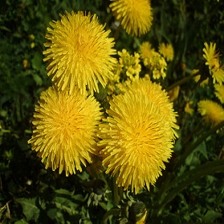

In [109]:
imge

## fuction for data collection x and y

In [6]:

x=[]
y = []
for key, valu in flower_list.items():
    for i in valu:
        img = cv2.imread(str(i))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_list_labels[key])
        



In [81]:
len(x)

3670

In [82]:
x[1].shape

(180, 180, 3)

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
x.shape

(3670, 180, 180, 3)

In [87]:
y.shape

(3670,)

In [88]:
x

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

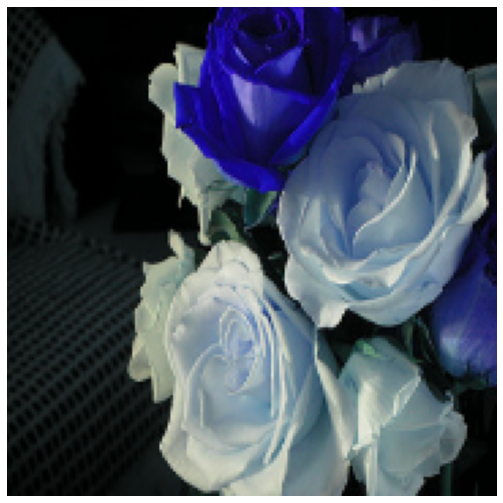

In [105]:
plt.figure(figsize=(9,9))
plt.imshow(x[1])       # it can read a array image
plt.axis('off')
plt.show()

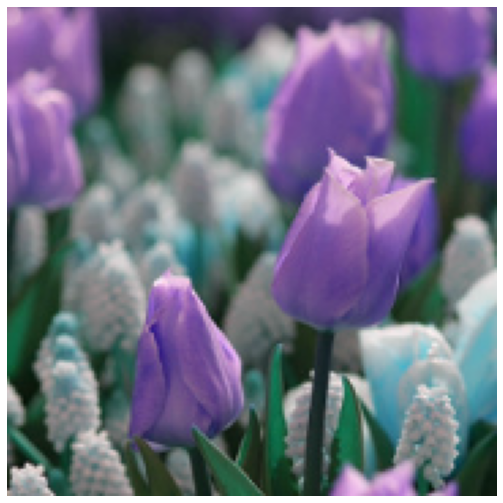

In [112]:
plt.figure(figsize=(9,9))
plt.imshow(x[3562])       # it can read a array image
plt.axis('off')
plt.show()

## train test split images

In [9]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [10]:
x_train.shape , y_train.shape

((2752, 180, 180, 3), (2752,))

In [118]:
x_test.shape , y_test.shape

((918, 180, 180, 3), (918,))

## normalize the image

In [121]:
x_train[1][1][1]      # for the demo purpose

array([22, 64, 55], dtype=uint8)

In [11]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [124]:
x_train_scaled[1][1][1]      # as you can see images are normalize

array([0.08627451, 0.25098039, 0.21568627])

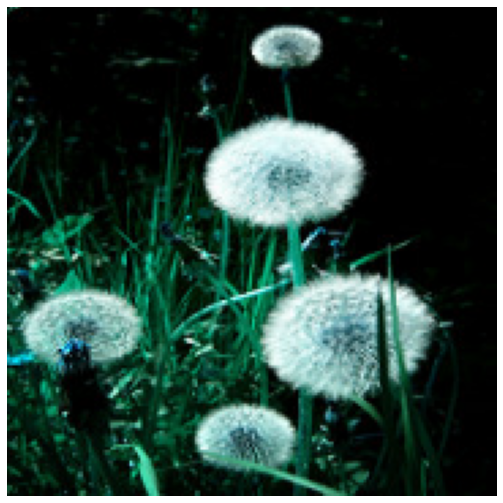

In [129]:
plt.figure(figsize=(9,9))
plt.imshow(x_train[52])       # it can read a array image
plt.axis('off')
plt.show()

# this is without normalize image

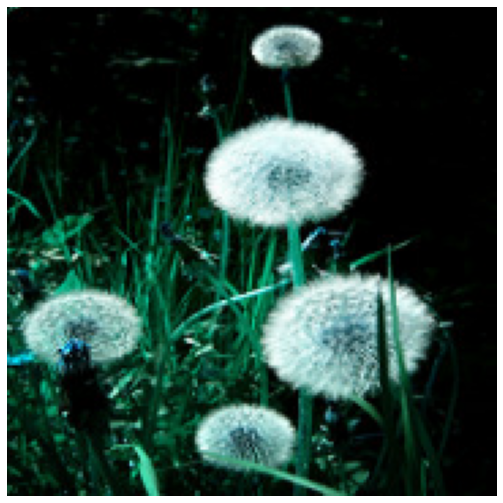

In [127]:
plt.figure(figsize=(9,9))
plt.imshow(x_train_scaled[52])       # it can read a array image
plt.axis('off')
plt.show()

# this is my normalize image as you can see

In [13]:
x_train_scaled.shape

(2752, 180, 180, 3)

## data augmentation layers in sequential model
another method is imagegenrator is used when u have no sufficient dataset
<br>
by using imagegenarator u can create different images with some different

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

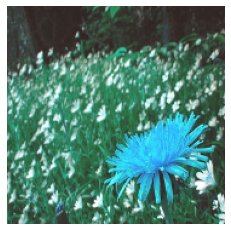

In [16]:
plt.axis('off')
plt.imshow(x_train_scaled[0])


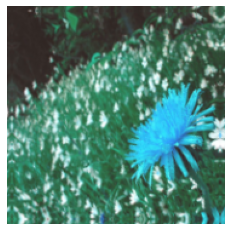

In [18]:
# image with dataaugmented
plt.axis('off')
plt.imshow(data_augmentation(x_train_scaled)[0])

## training model with data augmentation

In [20]:
num_classes = 5

model = Sequential([
  data_augmentation,           # here we did not define the input shape because we mentioned at the augmentation time
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(80, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=5)        # i did,nt pass validation_data parmeter that,s why i did,nt get val_acc and val_scor
#  i used only five epochs

Epoch 1/5
86/86 [==============================] - 103s 1s/step - loss: 1.4408 - accuracy: 0.4320
Epoch 2/5
86/86 [==============================] - 95s 1s/step - loss: 1.0602 - accuracy: 0.5701
Epoch 3/5
86/86 [==============================] - 95s 1s/step - loss: 0.9499 - accuracy: 0.6286
Epoch 4/5
86/86 [==============================] - 96s 1s/step - loss: 0.8813 - accuracy: 0.6599
Epoch 5/5
86/86 [==============================] - 100s 1s/step - loss: 0.8538 - accuracy: 0.6708


In [26]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 8s 274ms/step - loss: 0.9593 - accuracy: 0.6383


[0.9593484997749329, 0.6383442282676697]

In [33]:
model.save('flower_project_augmentation.h5')

In [38]:
prediction = model.predict(x_test_scaled)
prediction

29/29 [==============================] - 8s 282ms/step


array([[ 0.9337053 ,  3.9713554 , -1.2468842 , -2.9974961 , -0.22884385],
       [ 2.5503154 ,  0.1953941 , -0.69230694, -2.7816243 ,  2.3874109 ],
       [-1.1112819 ,  0.33418888,  2.970325  , -4.951535  , -1.9159507 ],
       ...,
       [ 1.5410488 , -0.7818124 , -1.2457869 ,  4.1560893 ,  0.95580244],
       [ 1.1779513 ,  0.6468764 , -0.7077796 , -1.353272  ,  1.1967807 ],
       [ 1.8774488 , -3.3522043 ,  0.87989604,  3.6333604 ,  2.0204747 ]],
      dtype=float32)

In [39]:
prediction[0:5]

array([[ 0.9337053 ,  3.9713554 , -1.2468842 , -2.9974961 , -0.22884385],
       [ 2.5503154 ,  0.1953941 , -0.69230694, -2.7816243 ,  2.3874109 ],
       [-1.1112819 ,  0.33418888,  2.970325  , -4.951535  , -1.9159507 ],
       [ 4.5591693 , -0.00699229, -3.1866038 ,  1.3504727 ,  5.420559  ],
       [-0.3732082 , -1.8786632 ,  1.8231565 ,  2.7034202 ,  0.05071629]],
      dtype=float32)

In [42]:
index_prediction = [np.argmax(first_predicton) for first_predicton in prediction]

In [44]:
index_prediction[0:10]

# prediction classes

[1, 0, 2, 4, 3, 3, 4, 0, 3, 0]

In [46]:
y_test[0:10]

# actual classes
# some of them classes are not classified accurate because i got 63% accuracy

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])

project finished 🤗🤗